In [1]:
import requests
import zipfile
import os
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback

In [2]:
# import requests
# url = 'https://storage.googleapis.com/platzi-tf2/sign-language-img.zip'

# response = requests.get(url)
# with open('data/sign_language_img.zip', 'wb') as f:
#     f.write(response.content)

In [3]:
# # En donde tenemos el archivo local?
# local_zip = 'data/sign_language_img.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# # En donde lo vamos a extraer? como se llamará la carpeta?
# zip_ref.extractall('data/sign_language_img')
# zip_ref.close()

# # Esto es opcional, pero yo prefiero eliminar el archivo zip
# os.remove(local_zip)

In [4]:
train_dir = 'data/sign_language_img/Train'
test_dir = 'data/sign_language_img/Test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'training'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [7]:
# Básicamente me crea una lista del abecedario exceptuando las que puse
clases = [char for char in string.ascii_uppercase if char!='J' if char != 'Z']

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

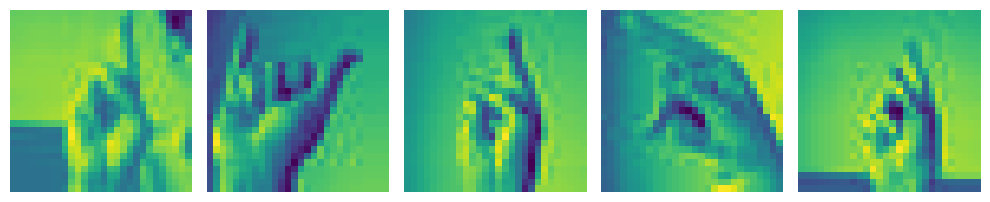

In [9]:
# Un generador siempre se usa con next
sample_training_images,_ = next(train_generator)
plotImages(sample_training_images[:5])

In [10]:
model_base = tf.keras.models.Sequential([
    # en este caso ya la comenzamos en flatten
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_base.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist = model_base.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20


d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 239s 991ms/step - accuracy: 0.2495 - loss: 2.5971 - val_accuracy: 0.5060 - val_loss: 1.5976
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - accuracy: 0.6100 - loss: 1.2865 - val_accuracy: 0.5853 - val_loss: 1.3271
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.7282 - loss: 0.8933 - val_accuracy: 0.6744 - val_loss: 1.0981
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8101 - loss: 0.6426 - val_accuracy: 0.6751 - val_loss: 1.0414
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8497 - loss: 0.5029 - val_accuracy: 0.7172 - val_loss: 0.9806
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.8993 - loss: 0.3581 - val_accuracy: 0.7151 - val_loss: 0.9812
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.9345 - loss: 0.2533 - val_accuracy: 0.7032 - val_loss: 1.0211
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.9580 - loss: 0.1866 - val_accur

In [13]:
model_base.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 41s 728ms/step - accuracy: 0.4800 - loss: 4.1217


[4.1039886474609375, 0.48201337456703186]

In [14]:
def visualizacion_resultados(hist):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    
    ax[0].plot(epochs, train_acc, 'go-', label='Train accuracy')
    ax[0].plot(epochs, val_acc, 'ro-', label='Val accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    
    ax[1].plot(epochs, train_loss, 'g*-', label='Train loss')
    ax[1].plot(epochs, val_loss, 'r*-', label='Val loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")   

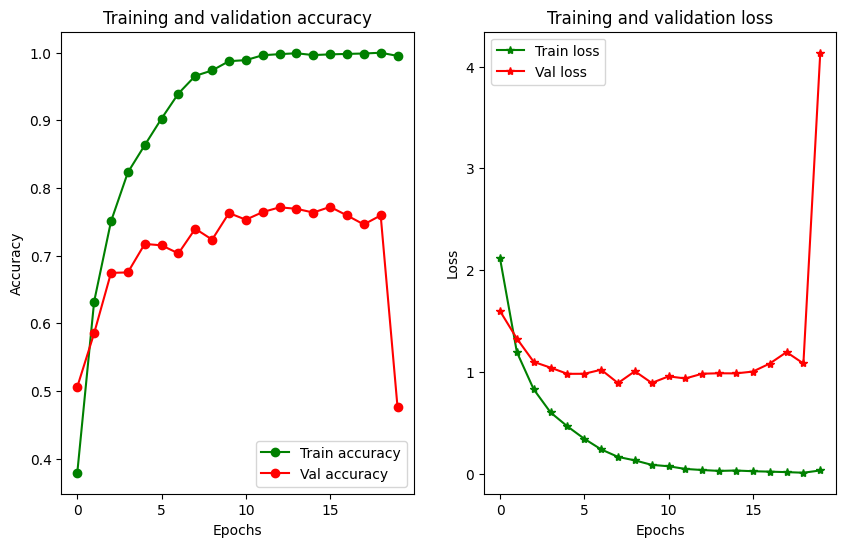

In [15]:
visualizacion_resultados(hist)

In [16]:
model_optimizer = tf.keras.models.Sequential([
    # en este caso ya la comenzamos en flatten
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_optimizer.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [17]:
model_optimizer.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
hist_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.1330 - loss: 2.9112 - val_accuracy: 0.4379 - val_loss: 1.8281
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.4520 - loss: 1.6992 - val_accuracy: 0.6070 - val_loss: 1.3557
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - accuracy: 0.5765 - loss: 1.2729 - val_accuracy: 0.6098 - val_loss: 1.2248
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.6629 - loss: 1.0154 - val_accuracy: 0.6779 - val_loss: 1.0588
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.7138 - loss: 0.8457 - val_accuracy: 0.6870 - val_loss: 1.0008
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.7508 - loss: 0.7325 - val_accuracy: 0.7144 - val_loss: 0.9235
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 61ms/step - accuracy: 0.7851 - loss: 0.6398 - val_accuracy: 0.7312 - val_loss: 0.9009
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.8165 - loss: 0.5468 - 

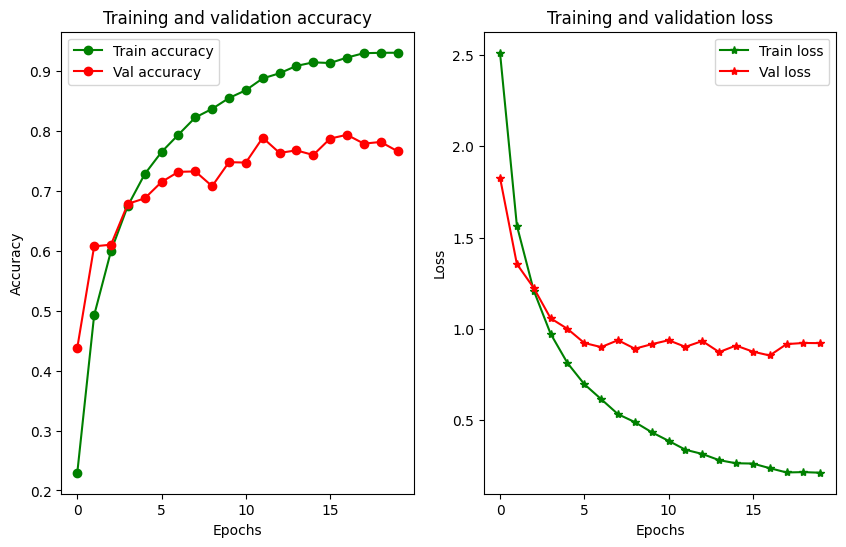

In [19]:
visualizacion_resultados(hist_optimizer)

In [20]:
model_convul = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_convul.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_convul.summary()

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
hist_convul = model_convul.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 104ms/step - accuracy: 0.2189 - loss: 2.6414 - val_accuracy: 0.6835 - val_loss: 0.9720
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.7808 - loss: 0.6799 - val_accuracy: 0.7712 - val_loss: 0.6941
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9169 - loss: 0.2794 - val_accuracy: 0.7958 - val_loss: 0.6272
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9642 - loss: 0.1468 - val_accuracy: 0.7965 - val_loss: 0.7047
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms/step - accuracy: 0.9819 - loss: 0.0893 - val_accuracy: 0.8239 - val_loss: 0.7021
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 24s 109ms/step - accuracy: 0.9894 - loss: 0.0655 - val_accuracy: 0.8288 - val_loss: 0.6877
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 23s 105ms/step - accuracy: 0.9927 - loss: 0.0514 - val_accuracy: 0.8435 - val_loss: 0.6782
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9931 - loss: 0.04

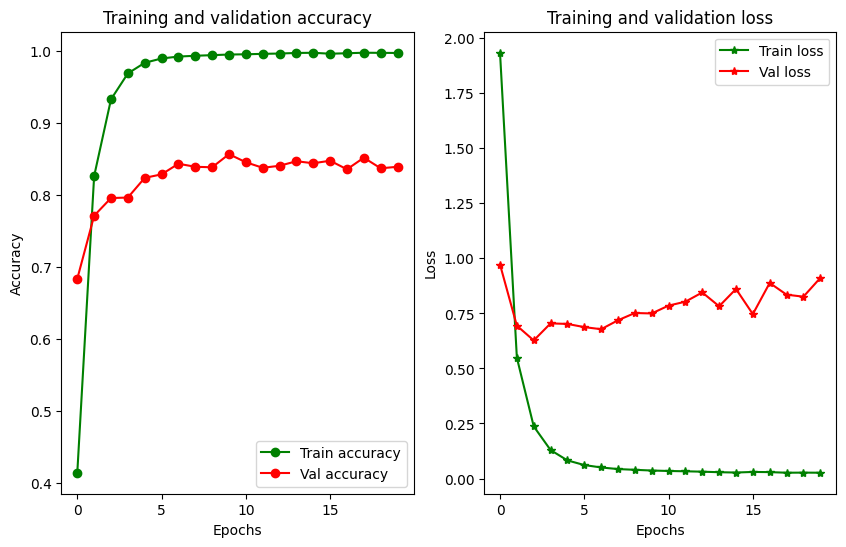

In [22]:
visualizacion_resultados(hist_convul)

In [23]:
model_callback = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_callback.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_callback.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
class TrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            self.model.stop_training = True

In [25]:
callback = TrainingCallback()

In [26]:
hist_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks=[callback],
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 88ms/step - accuracy: 0.2189 - loss: 2.6256 - val_accuracy: 0.6989 - val_loss: 0.9357
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.7977 - loss: 0.6443 - val_accuracy: 0.7832 - val_loss: 0.6212
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9262 - loss: 0.2625 - val_accuracy: 0.8309 - val_loss: 0.5610
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9724 - loss: 0.1286 - val_accuracy: 0.8414 - val_loss: 0.6293


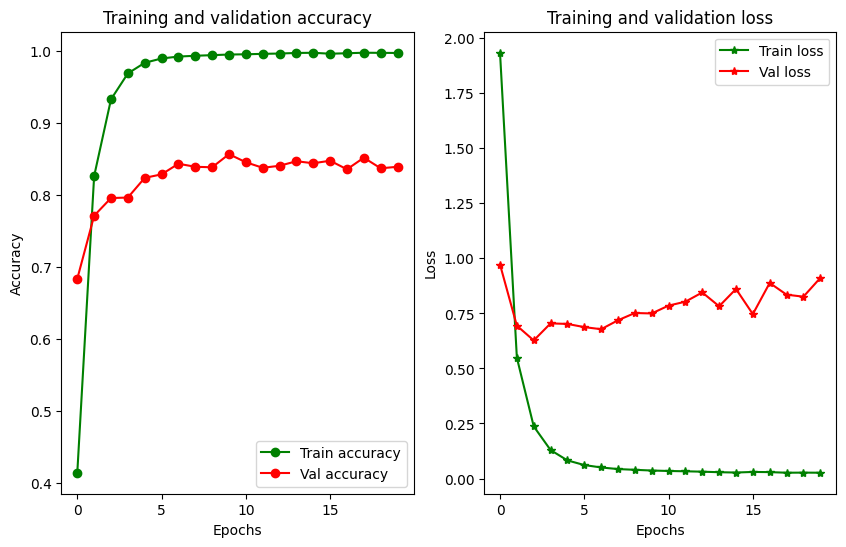

In [27]:
visualizacion_resultados(hist_convul)

In [28]:
def get_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(clases), activation='softmax')
    ])
    return model

model_early = get_model()
model_early.summary()
model_early.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, mode='auto')

hist_early = model_early.fit(
    train_generator,
    epochs=20,
    callbacks=[callback_early],
    validation_data = validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.2765 - loss: 2.4346 - val_accuracy: 0.7298 - val_loss: 0.8333
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.8477 - loss: 0.5133 - val_accuracy: 0.8189 - val_loss: 0.5690
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.9511 - loss: 0.1967 - val_accuracy: 0.8316 - val_loss: 0.5529
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9826 - loss: 0.0944 - val_accuracy: 0.8309 - val_loss: 0.5616
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.9893 - loss: 0.0655 - val_accuracy: 0.8484 - val_loss: 0.6044
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9925 - loss: 0.0510 - val_accuracy: 0.8639 - val_loss: 0.5550
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 98ms/step - accuracy: 0.9957 - loss: 0.0400 - val_accuracy: 0.8561 - val_loss: 0.6360
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9971 - loss: 0.0347 - 

In [30]:
import kerastuner as kt

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5208\1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [31]:
def constructor_modelos(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    
    hp_units = hp.Int("units", min_value=32, max_value=512, step = 32)
    model.add(tf.keras.layers.Dense(units=hp_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(len(clases), activation='softmax'))
    
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    return model

In [32]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='models/',
    project_name='kt_hyperband'
)

Reloading Tuner from models/kt_hyperband\tuner0.json


In [33]:
tuner.search(train_generator, epochs=20, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [34]:
print(best_hps.get('units'))

320


In [35]:
print(best_hps.get('learning_rate'))

0.01


In [36]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodoel = hypermodel.fit(train_generator, epochs=20, callbacks=[callback_early], validation_data=validation_generator)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 24s 103ms/step - accuracy: 0.3238 - loss: 2.3836 - val_accuracy: 0.7895 - val_loss: 0.7521
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.9374 - loss: 0.2276 - val_accuracy: 0.8133 - val_loss: 0.7877
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 101ms/step - accuracy: 0.9716 - loss: 0.1371 - val_accuracy: 0.8253 - val_loss: 0.9346


In [37]:
config_dict = hypermodel.get_config()

In [38]:
print(config_dict)

{'name': 'sequential_5', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_5'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registere

In [39]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [40]:
model_same_config.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 320)            │     1,730,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,775,384 (6.77 MB)

 Trainable params: 1,775,384 (6.77 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [42]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_weight.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

In [44]:
from keras.callbacks import ModelCheckpoint

checkpoin_path = 'model_checpoints/checkpoint.weights.h5'
checkpoin_weights = ModelCheckpoint(
    filepath=checkpoin_path,
    save_freq = 'epoch',
    save_weights_only=True,
    verbose=1
)

In [45]:
hits_weight = model_weight.fit(train_generator, epochs=20, callbacks=[checkpoin_weights], validation_data=validation_generator)

Epoch 1/20
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.2334 - loss: 2.6019
Epoch 1: saving model to model_checpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 24s 102ms/step - accuracy: 0.2352 - loss: 2.5951 - val_accuracy: 0.6982 - val_loss: 0.9355
Epoch 2/20
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.7943 - loss: 0.6415
Epoch 2: saving model to model_checpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.7948 - loss: 0.6403 - val_accuracy: 0.7747 - val_loss: 0.6380
Epoch 3/20
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.9253 - loss: 0.2664
Epoch 3: saving model to model_checpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.9255 - loss: 0.2659 - val_accuracy: 0.8140 - val_loss: 0.5845
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.9725 - loss: 0.1250
Epoch 4: saving model to model_checpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 23s 103ms

In [46]:
model_weight.save_weights('model_manul/my_model.weights.h5')

In [47]:
model_weight2 = get_model()
model_weight2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

In [48]:
model_weight2.load_weights(checkpoin_path)

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [49]:
model_weight2.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.8603 - loss: 0.7274


[0.7316789627075195, 0.8601505756378174]

In [50]:
model_weight.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8632 - loss: 0.6691


[0.7316790819168091, 0.8601505756378174]

## Criterios para almacenar los mejores modelos

In [51]:
checkpoin_path = 'model_checpoints_complete/checkpoint.keras'
checkpoin_weights = ModelCheckpoint(
    filepath=checkpoin_path,
    save_freq = 'epoch',
    save_weights_only = False,
    monitor = 'val_accuracy',
    save_best_only = True,
    verbose=1
)

In [52]:
model_complete = get_model()
model_complete.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist_complete = model_complete.fit(train_generator, epochs=20, callbacks=[checkpoin_weights], validation_data = validation_generator)  

Epoch 1/20
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2820 - loss: 2.4428
Epoch 1: val_accuracy improved from -inf to 0.72000, saving model to model_checpoints_complete/checkpoint.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.2841 - loss: 2.4354 - val_accuracy: 0.7200 - val_loss: 0.8742
Epoch 2/20
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.8565 - loss: 0.4751
Epoch 2: val_accuracy improved from 0.72000 to 0.81263, saving model to model_checpoints_complete/checkpoint.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8568 - loss: 0.4741 - val_accuracy: 0.8126 - val_loss: 0.6115
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9594 - loss: 0.1692
Epoch 3: val_accuracy improved from 0.81263 to 0.82667, saving model to model_checpoints_complete/checkpoint.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.9594 - loss: 0.1690 - val_accuracy: 0.8267 - val_loss: 0.6592
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 

In [53]:
model_complete.save('saved_model_complete/mymodel.keras')

In [54]:
model_complete3 = tf.keras.models.load_model('saved_model_complete/mymodel.keras')

In [55]:
model_complete3.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8605 - loss: 0.7329


[0.7608328461647034, 0.8563859462738037]

In [56]:
model_complete.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.8623 - loss: 0.7239


[0.7608328461647034, 0.8563859462738037]

## Aprendizaje por transferencia

In [57]:
train_generator_resize = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'rgb',
    subset = 'training'
)

validation_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'rgb',
    subset = 'validation'
)

test_generator_resize = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'rgb'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [58]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

pretrained_model = InceptionV3(input_shape=(150, 150, 3), include_top=False)

for layer in pretrained_model.layers:
    layer.trainable = False
    
pretrained_model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 74, 74,    │        864 │ input_layer_9[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 35, 35,    │      5,120 │ max_pooling2d_7[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [59]:
last_layers = pretrained_model.get_layer('mixed7')
last_output = last_layers.output

In [62]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(len(clases), activation='softmax')(x)

model_keras = tf.keras.Model(pretrained_model.input, x)
model_keras.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_keras.summary()

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 74, 74,    │        864 │ input_layer_9[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 74, 74,    │         96 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 74, 74,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 72, 72,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │         96 │ conv2d_8[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 72, 72,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 72, 72,    │        192 │ conv2d_9[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 72, 72,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 35, 35,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 35, 35,    │      5,120 │ max_pooling2d_7[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        240 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 33, 33,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 33, 33,    │        576 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 33, 33,    │          0 │ batch_normalizat

 Total params: 13,795,384 (52.63 MB)

 Trainable params: 4,820,120 (18.39 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [65]:
hist_keras = model_keras.fit(
    train_generator_resize,
    epochs= 5,
    validation_data = validation_generator_resize
)

Epoch 1/5


d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 546s 2s/step - accuracy: 0.8567 - loss: 0.5100 - val_accuracy: 0.9775 - val_loss: 0.0627
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 424s 2s/step - accuracy: 0.9992 - loss: 0.0046 - val_accuracy: 0.9825 - val_loss: 0.0499
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.9846 - val_loss: 0.0511
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.9846 - val_loss: 0.0440
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.9998 - loss: 0.0012 - val_accuracy: 0.9768 - val_loss: 0.0552


In [66]:
results = model_keras.evaluate(test_generator_resize)

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 155s 3s/step - accuracy: 0.9793 - loss: 0.0509


## Tensorflow hub

> Por ahora no sirve por error en unas librerias

In [86]:
# import tensorflow_hub as hub

In [87]:
# module_url = 'https://kaggle.com/models/google/mobilenet-v1/TensorFlow1/025-128-feature-vector/1'

# model_hub = tf.keras.Sequential([
#     tf.keras.layers.InputLayer(input_shape=(150,150,3)),
#     hub.KerasLayer(module_url, trainable=False),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(len(clases), activation='softmax')
# ])

# model_hub.build((None, 150,150,3))
# model_hub.summary()

In [ ]:
# model_hub.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# hist_hub = model_hub.fit(
#     train_generator_resize, 
#     epochs=5, 
#     validation_data=validation_generator_resize
# )

In [ ]:
# model_hub.evaluate(test_generator_resize)